In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV

# data loading, preparing CV

In [3]:
train = pd.read_csv('../../data/processed/train.csv', index_col=0)
train_labels = pd.read_csv('../../data/processed/train_labels.csv', index_col=0)

train.shape

(59400, 63)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, train_labels, random_state=42)
print(X_train.shape)
print(X_test.shape)

(44550, 63)
(14850, 63)


distribution of target variable across the two sets:

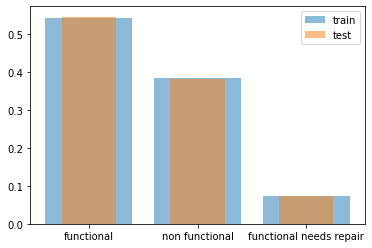

In [5]:
plt.figure()

plt.bar(x=y_train.status_group.value_counts(normalize=True).keys(), height=y_train.status_group.value_counts(normalize=True).values, alpha=0.5, label='train')
plt.bar(x=y_test.status_group.value_counts(normalize=True).keys(), height=y_test.status_group.value_counts(normalize=True).values, width=0.5, alpha=0.5, label='test')

plt.legend()

plt.show()

In [6]:
y_test.status_group.value_counts(normalize=True)

functional                 0.545320
non functional             0.382357
functional needs repair    0.072323
Name: status_group, dtype: float64

In [7]:
cv = StratifiedKFold(n_splits=5, random_state=42)

C:\Users\silvia\anaconda3\envs\pumpitup\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


# models
## random forest classifier

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
clf = RandomForestClassifier(bootstrap=True, random_state=42)

parameter_grid = {
    'n_estimators': [10, 50, 80, 100, 120, 150],
    'max_depth': [3, 5, 8, 12, 14, 16, 18, 20, 22, 24],
}

parameter_grid = {
    'n_estimators': [50, 80, 100],
    'max_depth': [20, 22, 24],
}

random_search = RandomizedSearchCV(clf, parameter_grid, cv=cv)

In [10]:
random_search.fit(X_train, y_train.status_group)

C:\Users\silvia\anaconda3\envs\pumpitup\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=False),
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                    

In [11]:
print(random_search.best_params_, random_search.best_score_)

{'n_estimators': 100, 'max_depth': 20} 0.7985185185185186


In [12]:
best = random_search.best_estimator_

best.fit(X_train, y_train)

<ipython-input-12-c7dc05aed871>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [13]:
y_pred = best.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.8001346801346801

# make predictions

In [16]:
external = pd.read_csv('../../data/processed/test.csv', index_col=0)

final_pred = best.predict(external)

In [17]:
out = pd.DataFrame(index=external.index)
out['status_group'] = final_pred

out.head()

status_group
id                   
50785  non functional
51630      functional
17168      functional
45559  non functional
49871      functional

In [18]:
out.to_csv('submission_test.csv')

Leaderboard score of 0.8058 (1435 out of 8986). Current top is 0.8289